## Imports

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import time

## Data Generation

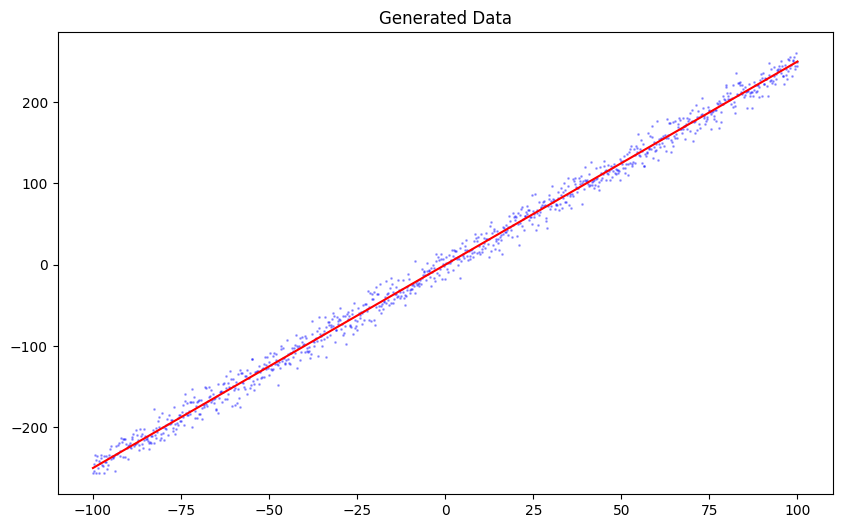

In [63]:
# declaring variables
m_true = 2.5
n_samples = 1000

# generating data
x = np.linspace(-100, 100, n_samples)
noise = np.random.normal(0, 10, n_samples)
y = m_true * x + noise

# plotting data
plt.figure(figsize=(10,6))
plt.scatter(x, y, color='blue', alpha=0.3, s=1)
plt.plot(x, m_true * x, color='red')
plt.title("Generated Data")
plt.show()

## Linear Search Implementation

Best m (Linear Search): 2.49, Time Taken: 0.008 seconds


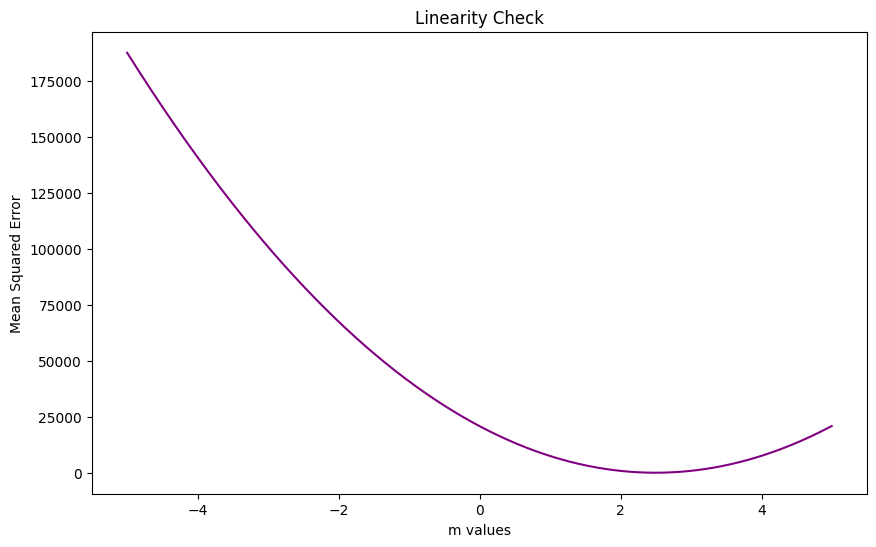

In [64]:
# linear search implementation
def linear_search(x, y, search_range=(-5, 5, 0.01), plot=False):
    """
    Linear search implementation to find the best m value

    Args:
        x (array): Input feature
        y (array): Target values
        c (float): Constant term
        plot (bool, optional): Whether to plot the results. Defaults to False.

    Returns:
        float: Best m value
        float: Time taken

    """

    # declaring search range
    m_search_range = np.arange(*search_range)
    errors = []

    start_time = time.time()

    for m_candidate in m_search_range:
        # making predictions
        y_pred = m_candidate * x

        # calculating mean squared error
        mse = np.mean((y - y_pred) ** 2)
        errors.append(mse)

    end_time = time.time()
    time_taken = end_time - start_time

    # finding best m
    best_m_index = np.argmin(errors)
    best_m = m_search_range[best_m_index]

    # plotting results
    if plot:
        plt.figure(figsize=(10,6))
        plt.plot(m_search_range, errors, color='purple')
        plt.xlabel('m values')
        plt.ylabel('Mean Squared Error')
        plt.title("Linearity Check")

        print(f'Best m (Linear Search): {best_m:.2f}, Time Taken: {time_taken:.3f} seconds')
        plt.show()

    # returning results
    return best_m, time_taken

# example usage
linear_m, linear_time = linear_search(x, y, plot=True)

## Gradient Descent Implementation

Early stopping at iteration 51 with relative error change 0.00088864
Final m (Gradient Descent): 2.51, Time Taken: 0.001 seconds


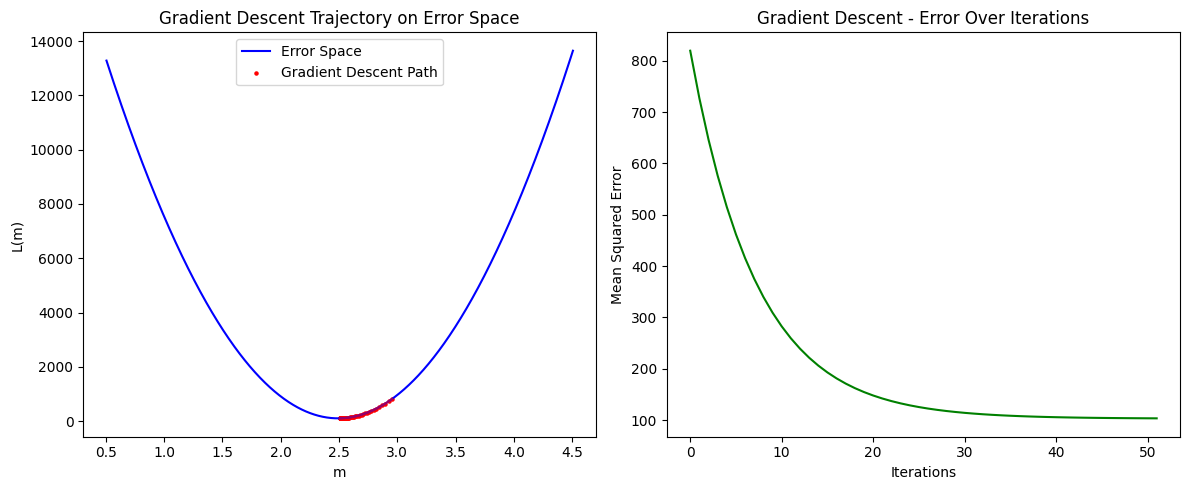

In [269]:
def gradient_descent(x, y, learning_rate=1e-5, max_iterations=100, tolerance=1e-3, plot=False):
    """
    Gradient descent implementation with early stopping based on relative error change and gradient magnitude.

    Args:
        x (array): Input feature
        y (array): Target values
        learning_rate (float, optional): Learning rate. Defaults to 1e-5.
        max_iterations (int, optional): Maximum number of iterations. Defaults to 1000.
        tolerance (float, optional): Early stopping threshold for relative error change or gradient magnitude. Defaults to 1e-4.
        plot (bool, optional): Whether to plot the results. Defaults to False.

    Returns:
        float: Best m value
        float: Time taken
    """
    
    # Initialize m with a random value
    m_current = np.random.uniform(-5, 5)
    errors = []
    m_values = []

    start_time = time.time()

    for i in range(max_iterations):
        # Calculate prediction and error
        y_pred = m_current * x
        error = np.mean((y - y_pred) ** 2)
        errors.append(error)
        m_values.append(m_current)

        # Compute gradient
        gradient = -2 * np.mean((y - y_pred) * x)
        
        # Early stopping: check relative error improvement
        if i > 0:
            error_change = abs(errors[-1] - errors[-2])
            rel_error_change = error_change / errors[-2] if errors[-2] != 0 else error_change
            if rel_error_change < tolerance or abs(gradient) < tolerance:
                print(f"Early stopping at iteration {i} with relative error change {rel_error_change:.8f}")
                break

        # Update m
        m_current -= learning_rate * gradient

    end_time = time.time()
    time_taken = end_time - start_time

    # Generate error space for plotting
    m_val_lin = np.linspace(m_current - 2, m_current + 2, 1000)
    lin_error = [np.mean((y - (m * x)) ** 2) for m in m_val_lin]

    if plot:
        plt.figure(figsize=(12, 5))
        
        # Plot gradient descent trajectory on error space
        plt.subplot(1, 2, 1)
        plt.plot(m_val_lin, lin_error, label="Error Space", color="blue")
        plt.scatter(m_values, errors, color="red", s=5, label="Gradient Descent Path")
        plt.plot(m_values, errors, color="red", alpha=0.6)
        plt.xlabel("m")
        plt.ylabel("L(m)")
        plt.title("Gradient Descent Trajectory on Error Space")
        plt.legend()

        # Plot error over iterations
        plt.subplot(1, 2, 2)
        plt.plot(range(len(errors)), errors, color='green')
        plt.xlabel('Iterations')
        plt.ylabel('Mean Squared Error')
        plt.title('Gradient Descent - Error Over Iterations')

        print(f'Final m (Gradient Descent): {m_current:.2f}, Time Taken: {time_taken:.3f} seconds')
        plt.tight_layout()
        plt.show()

    return m_current, time_taken

# Example usage:
gradient_m, gradient_time = gradient_descent(x, y, plot=True)